In [16]:
#from src.serializer.order import get_factory_list_from_order_data_frame
import pandas as pd
import datetime

df_orders = pd.read_csv("../data/order_large_main.csv", encoding="cp1252")

df_orders['Weight_kg'] = df_orders['Weight'] / 100000

#df_orders['Available_Time'] = df_orders['Available_Time'].astype('str')
df_orders['Available_Time'] = pd.to_datetime(
    df_orders['Available_Time'],
    format='%d/%m/%Y %H.%M',
    errors='coerce'
)
df_orders['Available_Date'] = df_orders['Available_Time'].dt.date

df_orders['Deadline'] = pd.to_datetime(
    df_orders['Deadline'],
    format='%d/%m/%Y %H.%M',  # note double space and dot separators
    errors='coerce'
)
df_orders['Deadline_Date'] = df_orders['Deadline'].dt.date
df_orders

,Order_ID,Material_ID,Item_ID,Source,Destination,Available_Time,Deadline,Danger_Type,Area,Weight,Delivery_Notes,Weight_kg,Available_Date,Deadline_Date
0,A140109,B-6128,P01-79c46a02-e12f-41c4-9ec9-25e48597ebfe,City_61,City_54,2022-05-04 23:59:00,2022-11-04 23:59:00,type_1,38880,30920000,NaN,309.20,2022-05-04,2022-11-04
1,A140109,B-6128,P01-43f08b0f-87f8-4a3f-91b8-40ed1947bdaa,City_61,City_54,2022-05-04 23:59:00,2022-11-04 23:59:00,type_1,38880,30920000,NaN,309.20,2022-05-04,2022-11-04
2,A140109,B-6128,P01-899d7387-aab0-4443-b6ba-7520fb4ee981,City_61,City_54,2022-05-04 23:59:00,2022-11-04 23:59:00,type_1,38880,30920000,NaN,309.20,2022-05-04,2022-11-04
3,A140109,B-6128,P01-acc23cdf-7fe7-4388-b8ff-5704eed86ef5,City_61,City_54,2022-05-04 23:59:00,2022-11-04 23:59:00,type_1,38880,30920000,NaN,309.20,2022-05-04,2022-11-04
4,A140109,B-6128,P01-cd0377d4-770c-45c3-9bd8-a5b098246e7e,City_61,City_54,2022-05-04 23:59:00,2022-11-04 23:59:00,type_1,38880,30920000,NaN,309.20,2022-05-04,2022-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,A240337,X-6746,f44529a9-f2c9-48b2-ad57-72a163e96eaa,City_61,City_9,2022-06-04 23:59:00,2022-10-04 23:59:00,non_danger,12100,1015000,NaN,10.15,2022-06-04,2022-10-04
4631,A240346,X-6746,0fda1fa3-4e0b-4e9a-8515-282cd747a51d,City_61,City_9,2022-06-04 23:59:00,2022-10-04 23:59:00,non_danger,12100,1015000,NaN,10.15,2022-06-04,2022-10-04
4632,A270227,X-5757,04e0ff4e-9ee0-4d24-97ff-76545e6917aa,City_61,City_22,2022-07-04 23:59:00,2022-09-04 11:59:00,non_danger,12100,489000,All drivers must wear safety vests and helmets...,4.89,2022-07-04,2022-09-04
4633,A270227,X-5757,576c363f-6796-45e1-9283-502f651b0312,City_61,City_22,2022-07-04 23:59:00,2022-09-04 11:59:00,non_danger,12100,489000,NaN,4.89,2022-07-04,2022-09-04


In [8]:
df_orders['Area'] = df_orders['Area'] / 10000
df_orders['Area'].describe()

count    4635.000000
mean        2.026844
std         1.253102
min         0.637500
25%         0.984000
50%         1.254400
75%         3.098900
max         9.720000
Name: Area, dtype: float64

In [8]:
df_orders['Weight'].sum() / 1000000

52069.518

In [56]:
# sum of df_orders['Weight_kg']
total_weight = df_orders['Weight_kg'].sum()

total_vehicles_capacity = 10000+ 5000+ 2000

total_trips_needed = total_weight / total_vehicles_capacity
print(f"Total weight: {total_weight} kg")
print(f"Total trips needed: {total_trips_needed}")

# total trip per vehicle
trips_per_vehicle = total_trips_needed / 3
print(f"Total trips per vehicle: {trips_per_vehicle}")


Total weight: 520695.18000000005 kg
Total trips needed: 30.62912823529412
Total trips per vehicle: 10.209709411764708


<Axes: title={'center': 'Total Weight over Deadline Date'}, xlabel='Deadline_Date'>

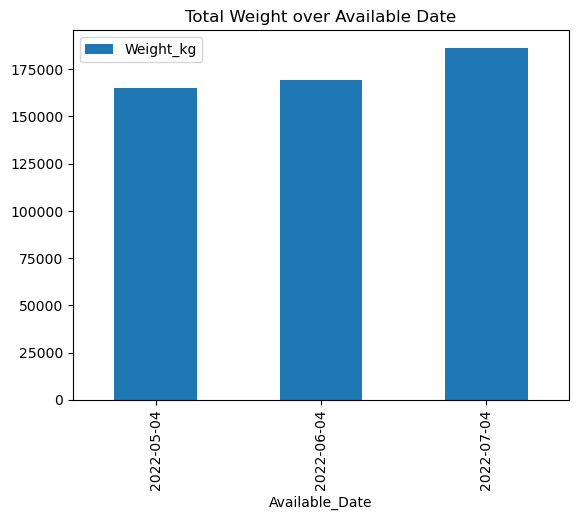

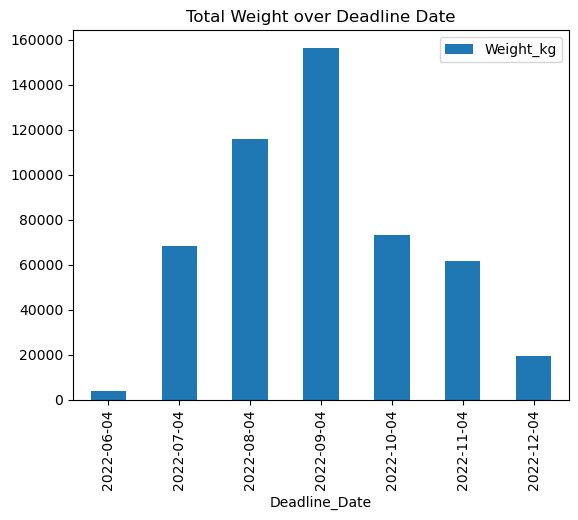

In [17]:
# group by Avaialable_Date, sum of weight and volume
df_grouped_availale_date = df_orders.groupby(["Available_Date"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()

# deadline date
df_grouped_deadline_date = df_orders.groupby(["Deadline_Date"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()

# plot df_grouped_availale_date over avaialable date
df_grouped_availale_date.plot(x='Available_Date', y='Weight_kg', kind='bar', title='Total Weight over Available Date')
df_grouped_deadline_date.plot(x='Deadline_Date', y='Weight_kg', kind='bar', title='Total Weight over Deadline Date')

In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        4635 non-null   object 
 1   Material_ID     4635 non-null   object 
 2   Item_ID         4635 non-null   object 
 3   Source          4635 non-null   object 
 4   Destination     4635 non-null   object 
 5   Available_Time  4635 non-null   object 
 6   Deadline        4635 non-null   object 
 7   Danger_Type     4635 non-null   object 
 8   Area            4635 non-null   int64  
 9   Weight          4635 non-null   int64  
 10  Delivery_Notes  677 non-null    object 
 11  Weight_kg       4635 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 434.7+ KB


In [18]:
# group by Order_ID, source and destination, sum the weight, and volume
df_grouped = df_orders.groupby(["Destination"]).agg(
    {"Weight_kg": "sum", "Area": "sum", 'Item_ID': 'count'}
).reset_index()
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Destination  61 non-null     object 
 1   Weight_kg    61 non-null     float64
 2   Area         61 non-null     int64  
 3   Item_ID      61 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [19]:
df_grouped[df_grouped['Weight_kg'] > 10000]

,Destination,Weight_kg,Area,Item_ID
4,City_12,13313.20,2437520,93
5,City_13,39758.40,6135822,198
8,City_16,18070.50,4578525,105
9,City_17,15984.00,2073600,216
11,City_19,17171.00,2247480,94
17,City_24,27883.10,1907475,177
19,City_26,17237.98,3360590,173
21,City_28,15407.66,3815455,89
23,City_3,10424.25,1918080,105
29,City_35,30925.68,4641860,243


<Axes: title={'center': 'Bar Plot of Weight_kg per Destination'}>

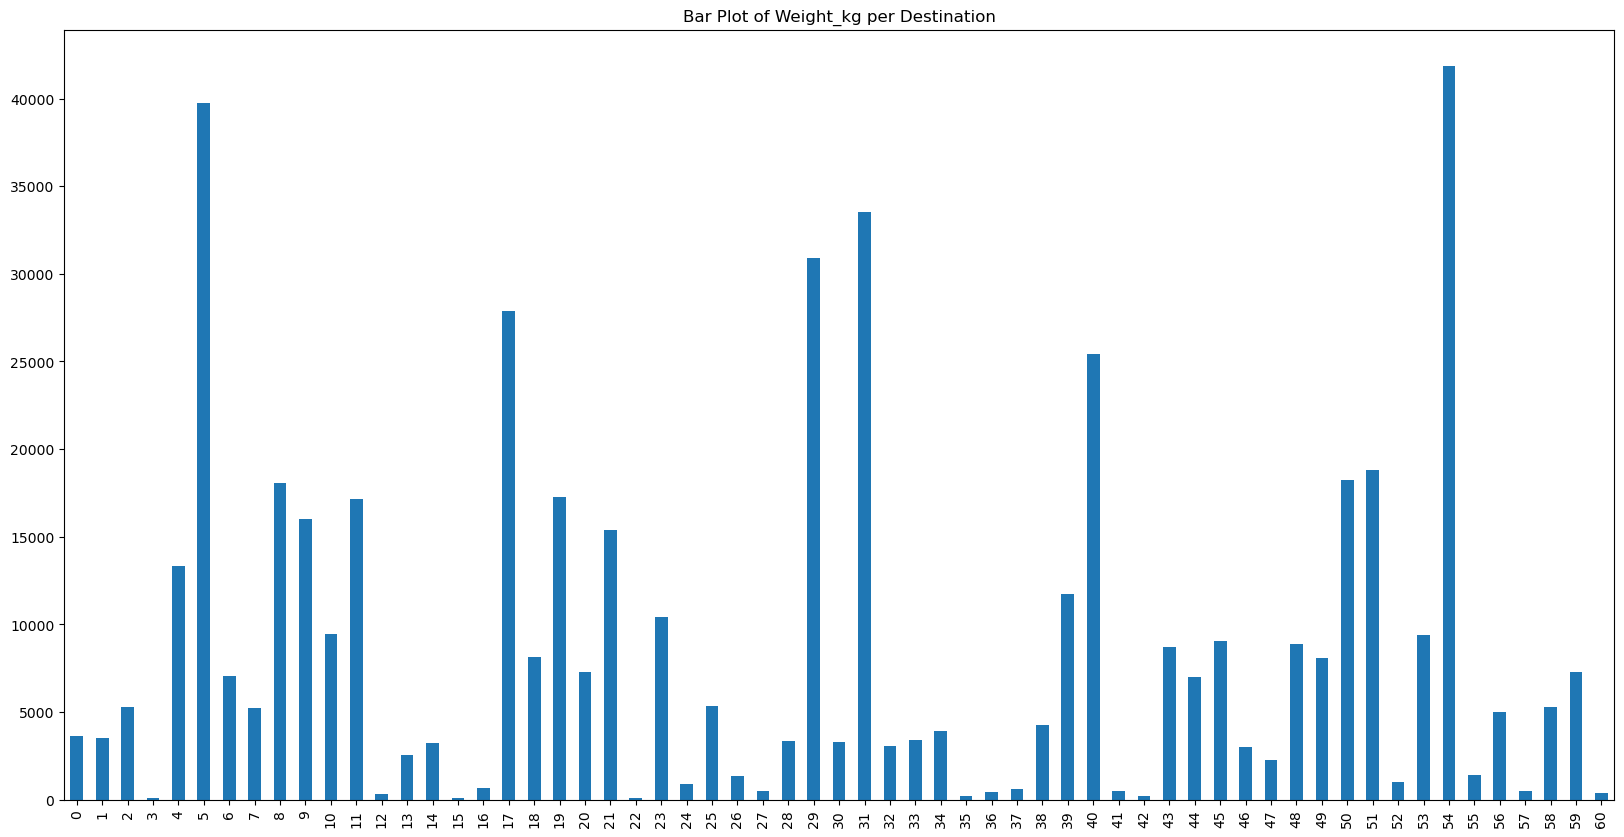

In [25]:
# bar plot of df_grouped['Weight_kg'] for each destination
df_grouped['Weight_kg'].plot(kind='bar', title='Bar Plot of Weight_kg per Destination', figsize=(20, 10))


<Axes: title={'center': 'Histogram of Items per Destination'}, ylabel='Frequency'>

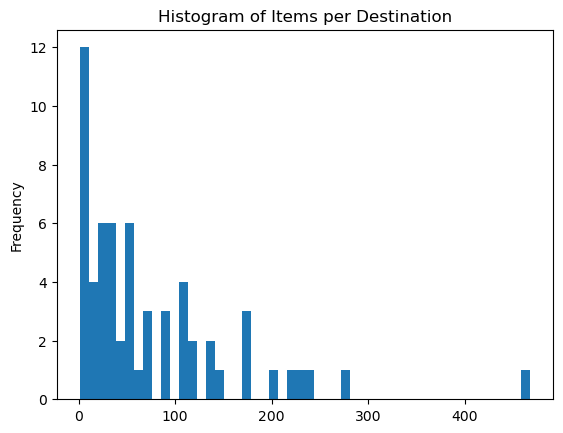

In [21]:
df_grouped['Item_ID'].plot(kind='hist', bins=50, title='Histogram of Items per Destination')

In [26]:
# read distance file
df_distance = pd.read_csv("../data/distance.csv", encoding="cp1252")

In [27]:
# the longest distance is 61
df_distance['Source'].max()
# what is the distance of longest distance
df_distance[df_distance['Source'] == 'City_61'].max() # 2584.493 km

Source         City_61
Destination     City_9
Distance(M)    2584493
dtype: object

In [4]:
import pandas as pd
distance_df = pd.read_csv("../data/distance.csv")
for _, row in distance_df[:5].iterrows():
    source_id = row["Source"].split('_')[1]
    destination_id = row["Destination"].split('_')[1]
    distance_value = row["Distance(M)"]

    print(f"Source: {source_id}, Destination: {destination_id}, Distance: {distance_value} m")


Source: 24, Destination: 47, Distance: 1114251 m
Source: 24, Destination: 31, Distance: 97187 m
Source: 24, Destination: 54, Distance: 1716028 m
Source: 24, Destination: 53, Distance: 1729925 m
Source: 24, Destination: 19, Distance: 1594107 m
